<a href="https://colab.research.google.com/github/thesuper147/Carbon-Emissions_CS_DSRP/blob/main/Carbon_Emissions_CS_DSRP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import pandas as pd
import matplotlib as plt
df = pd.read_csv('/SupplyChainEmissions.csv')

df = df.drop(columns=['2017 NAICS Code', 'Reference USEEIO Code'])


df.rename(columns={
    '2017 NAICS Title': 'Industry',
    'Supply Chain Emission Factors without Margins': 'Emissions_No_Margins',
    'Margins of Supply Chain Emission Factors': 'Margins',
    'Supply Chain Emission Factors with Margins': 'Total_Emissions'
}, inplace=True)


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1016 entries, 0 to 1015
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Industry              1016 non-null   object 
 1   GHG                   1016 non-null   object 
 2   Unit                  1016 non-null   object 
 3   Emissions_No_Margins  1016 non-null   float64
 4   Margins               1016 non-null   float64
 5   Total_Emissions       1016 non-null   float64
dtypes: float64(3), object(3)
memory usage: 47.8+ KB


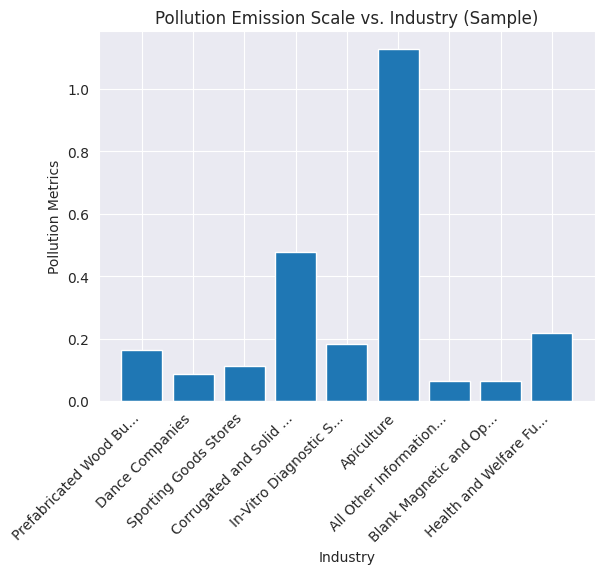

In [46]:
import matplotlib.pyplot as plt



sample_df = df.sample(9)
x_category = sample_df['Industry']
y_value = sample_df['Total_Emissions']


plt.bar(
    [label[:21] + '...' if len(label) > 21 else label for label in x_category],
    y_value,
    label="Pollution Emission Scale vs. Industry"
)
plt.xlabel("Industry")
plt.ylabel("Pollution Metrics")
plt.title("Pollution Emission Scale vs. Industry (Sample)")
plt.xticks(rotation=45, ha="right")
plt.show()

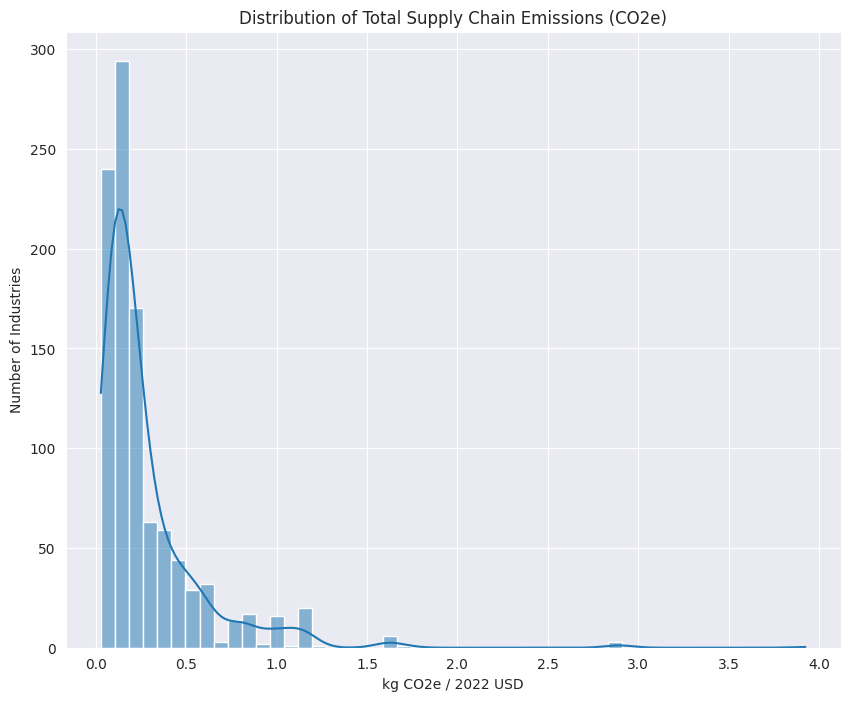

In [48]:

import seaborn as sns


sns.set_style('darkgrid')


plt.figure(figsize=(10, 8))
sns.histplot(df['Total_Emissions'], bins=50, kde=True)
plt.title('Distribution of Total Supply Chain Emissions (CO2e)')
plt.xlabel('kg CO2e / 2022 USD')
plt.ylabel('Number of Industries')
plt.show()


In [60]:
import numpy as np

df_consumer = df.copy()


df_consumer['Consumer Category'] = 'Other'


keywords_map = {
    'Housing & Utilities': ['Power generation', 'Electric', 'Residential', 'Construction', 'Natural gas', 'Water', 'Sewer', 'Furniture', 'Appliance', 'Plumbing'],
    'Food & Beverages': ['Farm', 'Food', 'Crop', 'Animal', 'Fishing', 'Breakfast', 'Cereal', 'Sugar', 'Winery', 'Brewery', 'Restaurant', 'Grocery'],
    'Transportation': ['Automobile', 'Vehicle', 'Gasoline', 'Air transport', 'Rail', 'Transit', 'Pipeline', 'Taxi'],
    'Apparel & Footwear': ['Apparel', 'Textile', 'Clothing', 'Fabric', 'Leather', 'Footwear'],
    'Healthcare': ['Hospital', 'Ambulatory', 'Health', 'Pharmaceutical', 'Medical', 'Surgical', 'Surgery', 'Psychology', 'Doctor', 'Pharmacy', 'Veterinary'],
    'Entertainment & Recreation': ['Hotel', 'Amusement', 'Recreation', 'Museum', 'Arts', 'Spectator sports', 'Book', 'Motion picture'],
    'Financial & Professional Services': ['Securities', 'Insurance', 'Credit', 'Monetary', 'Legal', 'Accounting', 'Bank','Financing']
}


for category, keywords in keywords_map.items():
    pattern = '|'.join(keywords)
    mask = df_consumer['Industry'].str.contains(pattern, case=False)
    df_consumer.loc[mask, 'Consumer Category'] = category


print("Number of industries assigned to each category:")
print(df_consumer['Consumer Category'].value_counts())


print("\nSample of mapped industries:")
print(df_consumer[['Industry', 'Consumer Category']].sample(10))

Number of industries assigned to each category:
Consumer Category
Other                                709
Food & Beverages                      72
Housing & Utilities                   59
Transportation                        44
Entertainment & Recreation            42
Apparel & Footwear                    35
Financial & Professional Services     29
Healthcare                            26
Name: count, dtype: int64

Sample of mapped industries:
                                              Industry Consumer Category
365  Air-Conditioning and Warm Air Heating Equipmen...             Other
522  Other Miscellaneous Durable Goods Merchant Who...             Other
240     All Other Basic Organic Chemical Manufacturing             Other
488                 Tire and Tube Merchant Wholesalers             Other
948                                  Skiing Facilities             Other
201                                  Wood Preservation             Other
696                   Other Sound Recor